# Task 1: Probability (25 points)

### A. (5 pts) Plot the probability density function p(x) of a one dimensional Gaussian distribution N(x; 1; 1).
Hint: you might want to look at the library scipy.stats and use the function norm.pdf().

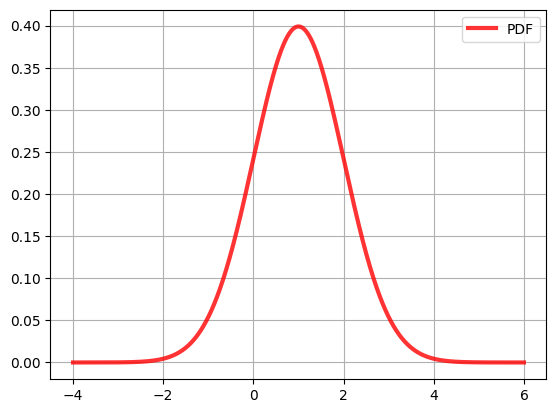

In [99]:
import numpy as np
from scipy.stats import norm
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline
mu_x = 1
sigma_x = 1
x = np.arange(mu_x - 5 * sigma_x, mu_x + 5 * sigma_x, 0.001)
p_x = norm.pdf(x, loc = mu_x, scale = sigma_x)
plt.plot(x, p_x, 'r-', lw = 3, alpha = 0.8, label = "PDF")
plt.legend()
plt.grid()


### B. (5 pts) Calculate the probability R mass that the random variable X is less than 0

CDF for x from -inf to 0 =  0.15865525393145707


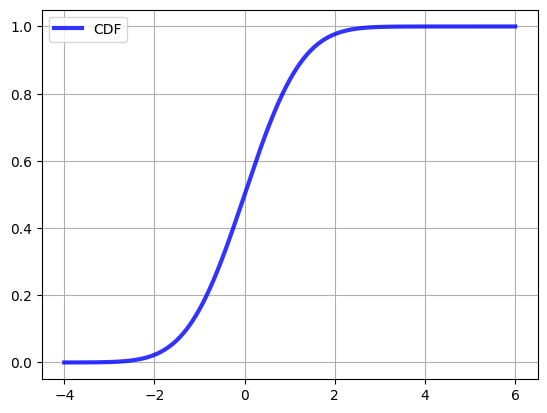

In [100]:
plt.plot(x, norm.cdf(x), 'b-', lw = 3, alpha = 0.8, label = 'CDF')
plt.legend()
plt.grid()
print("CDF for x from -inf to 0 = ", norm.cdf(0, loc=mu_x, scale=sigma_x))

### C. (15 pts) Consider the new observation variable z, it gives information about the variable x by the likelihood function p(z|x) = N(z; x; σ^2), with variance σ^2 = 0,2. Apply the Bayes’ theorem to derive the posterior distribution, p(x|z), given an observation z = 0,75 and plot it. For a better comparison, plot the prior distribution, p(x), too.
Hint: There are different ways in which the normalization factor for the posterior can be calculated (e.g. or direct derivation, numerical normalization, etc.). Choose one method.

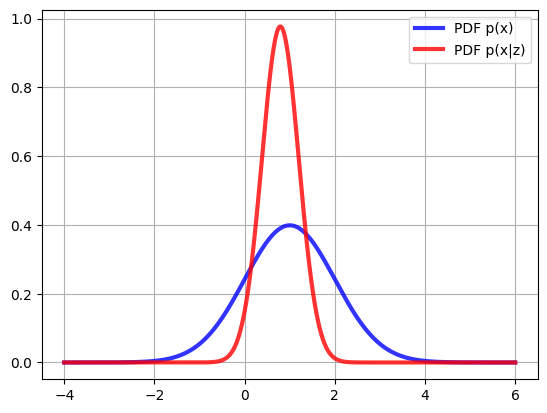

In [101]:
z = 0.75
sigma_z = 0.2 ** 0.5
p_z_x = norm.pdf(z, loc = x, scale = sigma_z)
plt.plot(x, p_x, 'b-', lw = 3, alpha = 0.8, label = 'PDF p(x)')
p_x_z = p_z_x * p_x / (np.trapz(p_z_x * p_x, x = x))
plt.plot(x, p_x_z, 'r-', lw = 3, alpha = 0.8, label = 'PDF p(x|z)')
plt.grid()
plt.legend();


# Task 2: Multivariate Gaussian (35 points)

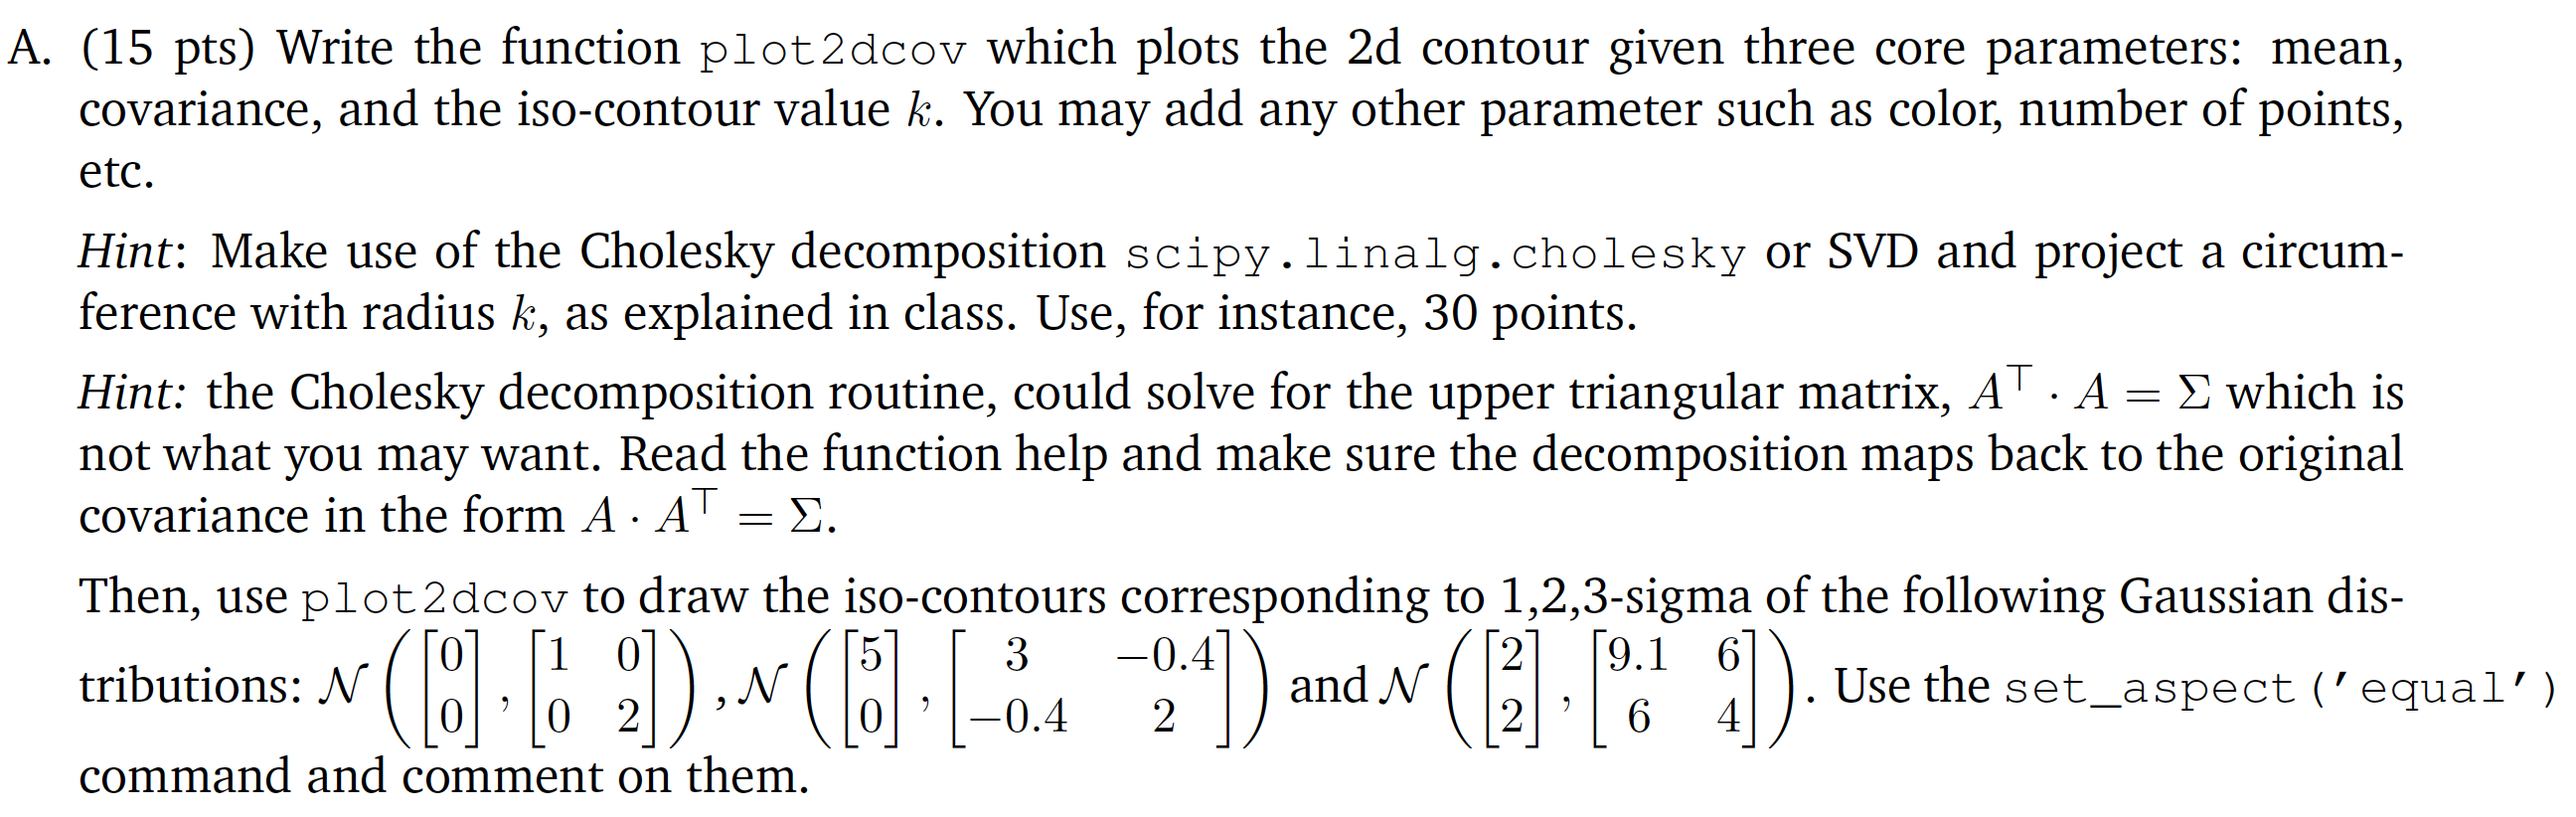

In [2]:
def plot2dcov (mu, cov, k, label):
    L = np.linalg.cholesky(cov)
    x = []
    y = []
    for ph in np.arange(0, 2 * np.pi, 0.01):
        x.append((L @ np.array([[np.cos(ph)], [np.sin(ph)]]))[0] * k + mu[0, 0])
        y.append((L @ np.array([[np.cos(ph)], [np.sin(ph)]]))[1] * k + mu[1, 0])
    plt.plot(x ,y, label = label, lw = 2)
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    



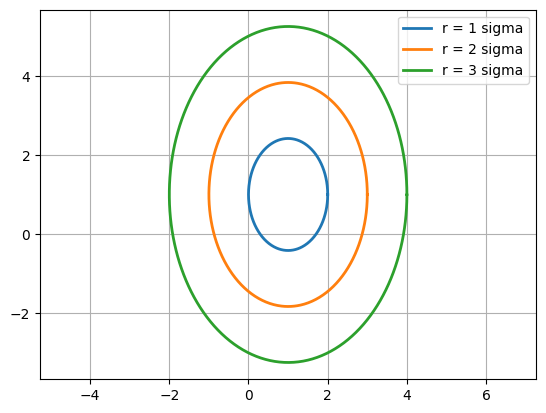

In [103]:
cov = np.array([[1, 0], [0, 2]])
mu = np.array([[1], [1]])

plot2dcov(mu, cov, 1, "r = 1 sigma")
plot2dcov(mu, cov, 2, "r = 2 sigma")
plot2dcov(mu, cov, 3, "r = 3 sigma")



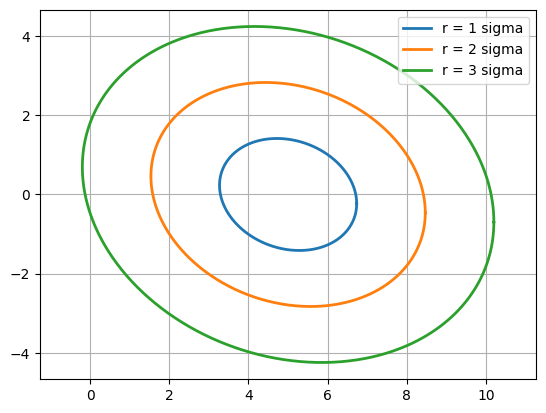

In [104]:
cov = np.array([[3, -0.4], [-0.4, 2]])
mu = np.array([[5], [0]])

plot2dcov(mu, cov, 1, "r = 1 sigma")
plot2dcov(mu, cov, 2, "r = 2 sigma")
plot2dcov(mu, cov, 3, "r = 3 sigma")


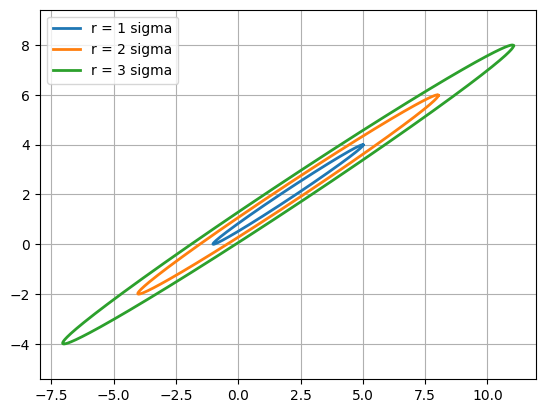

In [105]:
cov = np.array([[9.1, 6], [6, 4]])
mu = np.array([[2], [2]])

plot2dcov(mu, cov, 1, "r = 1 sigma")
plot2dcov(mu, cov, 2, "r = 2 sigma")
plot2dcov(mu, cov, 3, "r = 3 sigma")

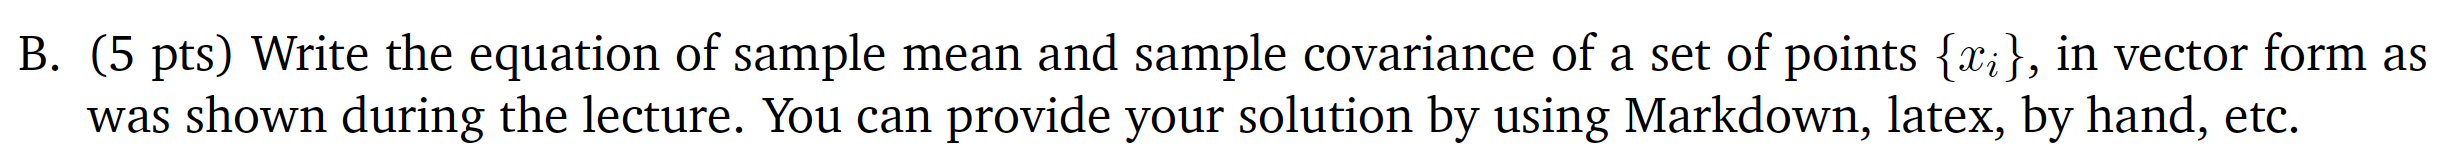

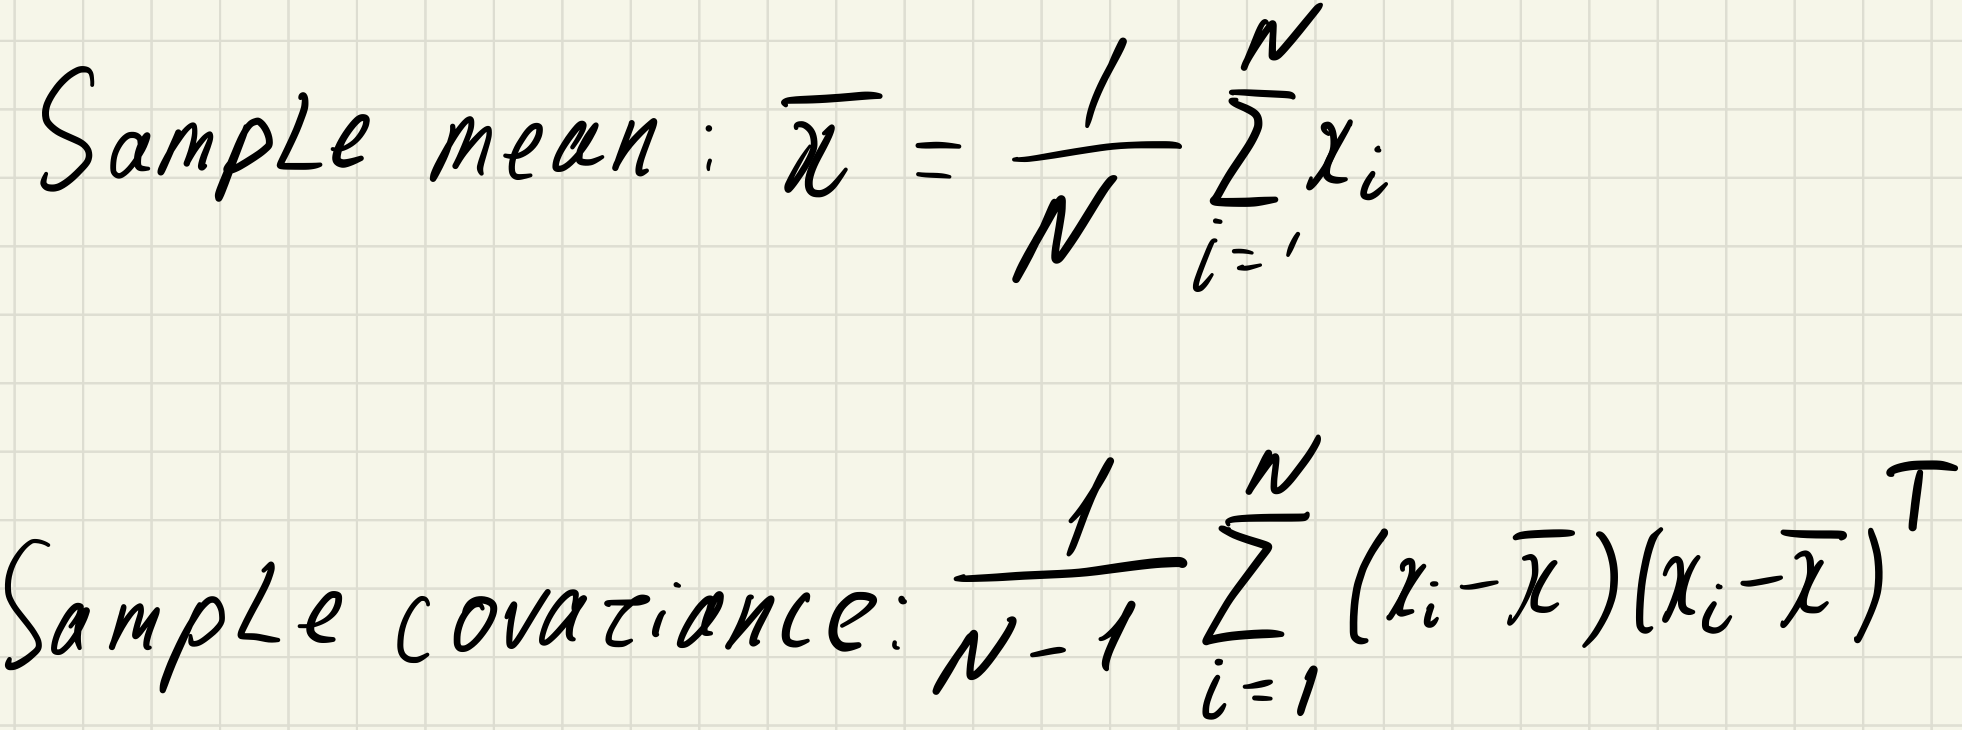

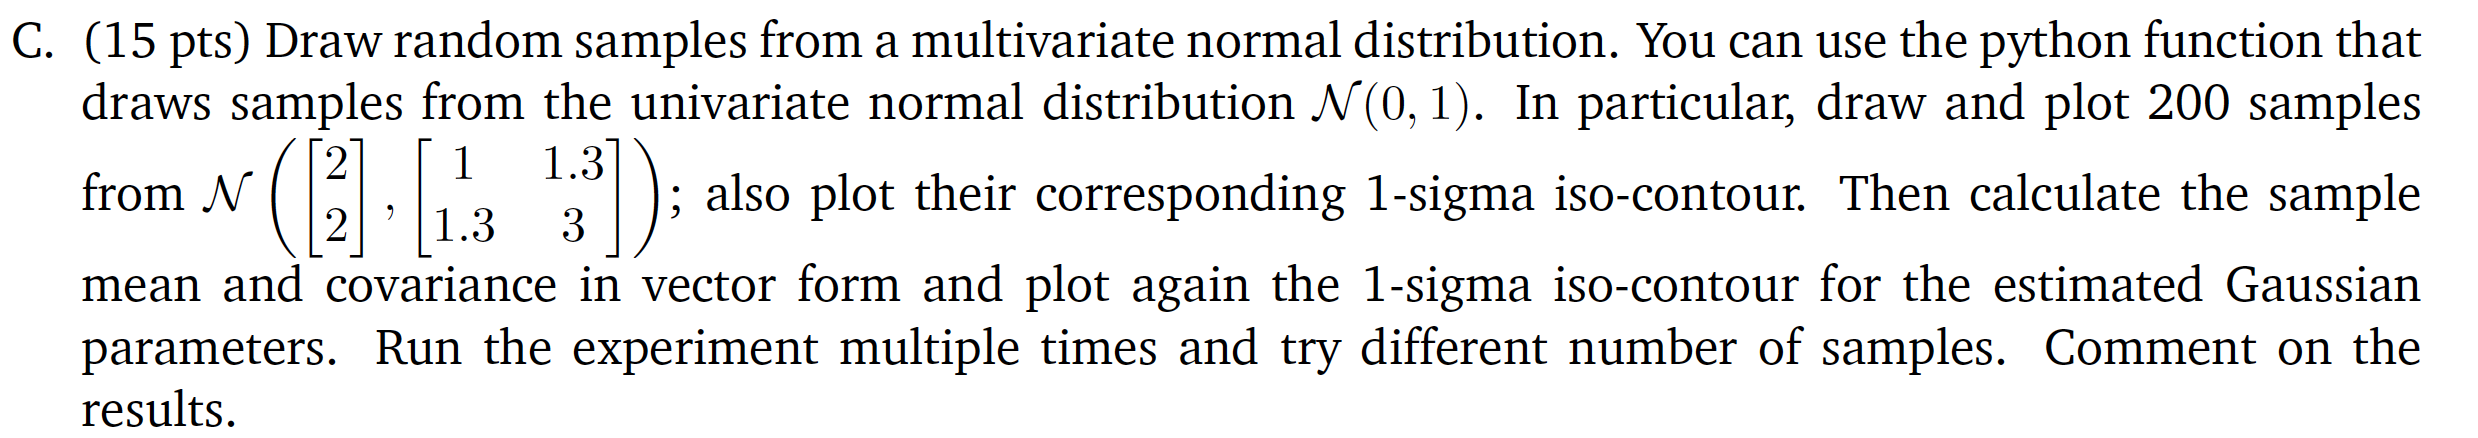

In [106]:
cov = np.array([[1, 1.3], [1.3, 3]])
mu = np.array([2, 2])

X = np.array([[x], [x]])

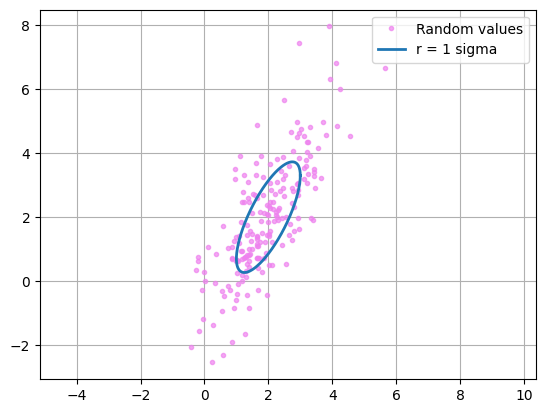

In [107]:
x, y = np.random.multivariate_normal(mu, cov, 200).T
plt.plot(x, y, '.', alpha = 0.7, c = "violet", label = "Random values")
plot2dcov (mu.reshape((2, 1)), cov, 1, "r = 1 sigma")


In [108]:
X = np.stack((x, y), axis=0)
print("Covariance matrix:\n", np.cov(X))


Covariance matrix:
 [[1.0628067  1.42758647]
 [1.42758647 3.30557331]]


In [109]:
print('Mean x = ',np.mean(x))
print('Mean y = ',np.mean(y))

Mean x =  1.9173331879621116
Mean y =  1.9742120784269388


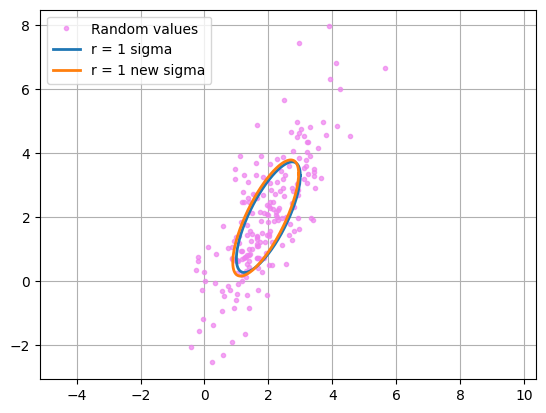

In [110]:
plt.plot(x, y, '.', label = "Random values", alpha = 0.7, c = "violet")
plt.grid()
plot2dcov (mu.reshape((2, 1)), cov, 1, "r = 1 sigma")
plot2dcov(np.array([[np.mean(x)], [np.mean(y)]]), np.cov(X), 1, "r = 1 new sigma")

The factic covariance and the mean value depend on the number of samples: more samples - real parameters are more closer to the original ones. The calculated parameters will coincide with the original ones only when N tends to infinity

# Task 3: Covariance Propagation (40 points)

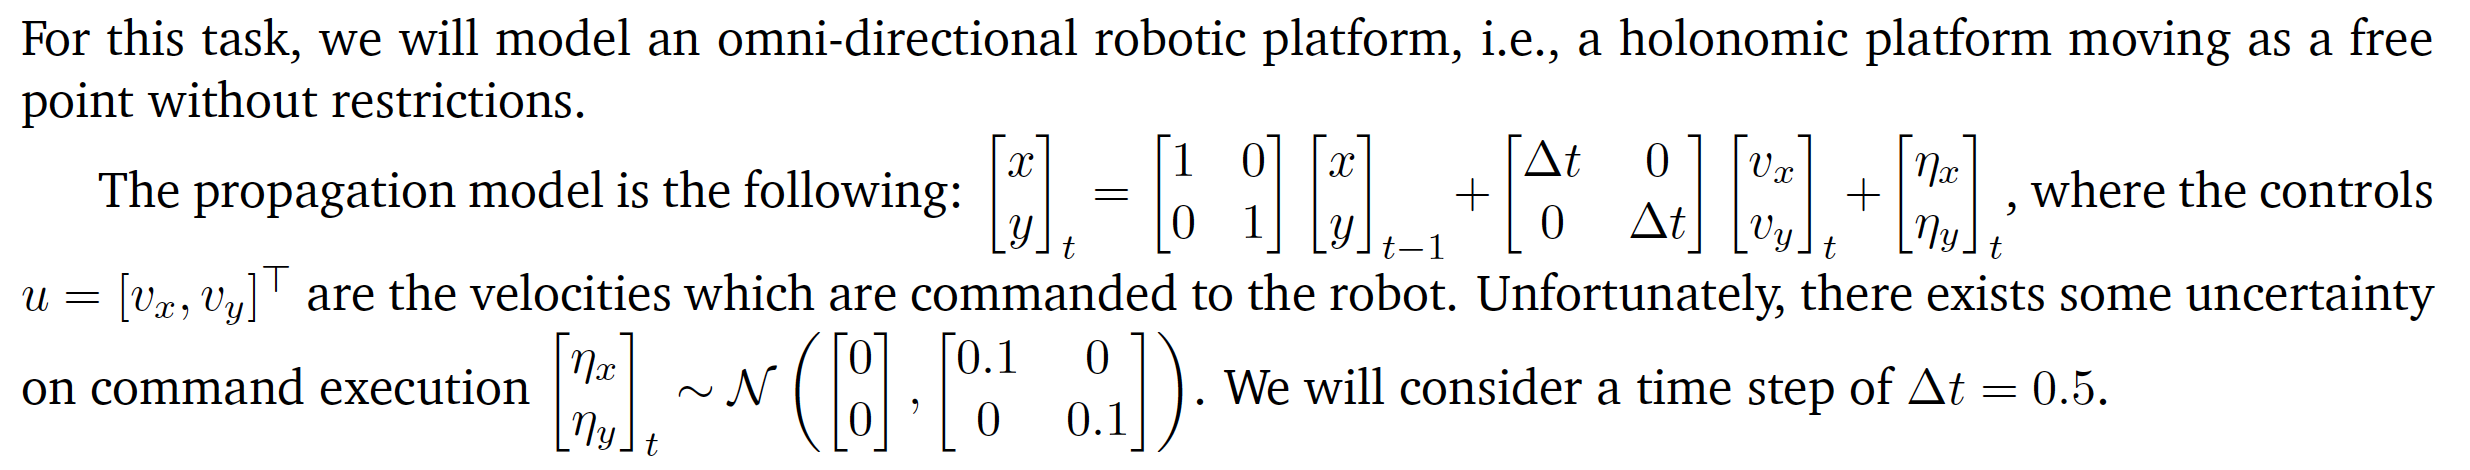

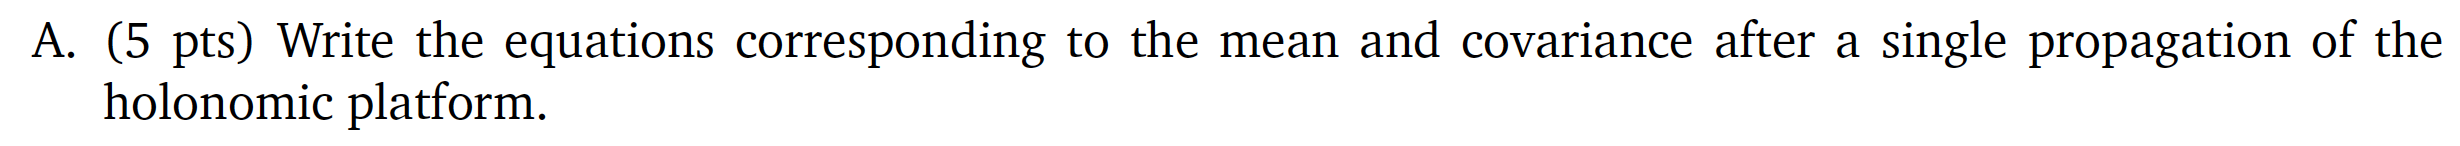

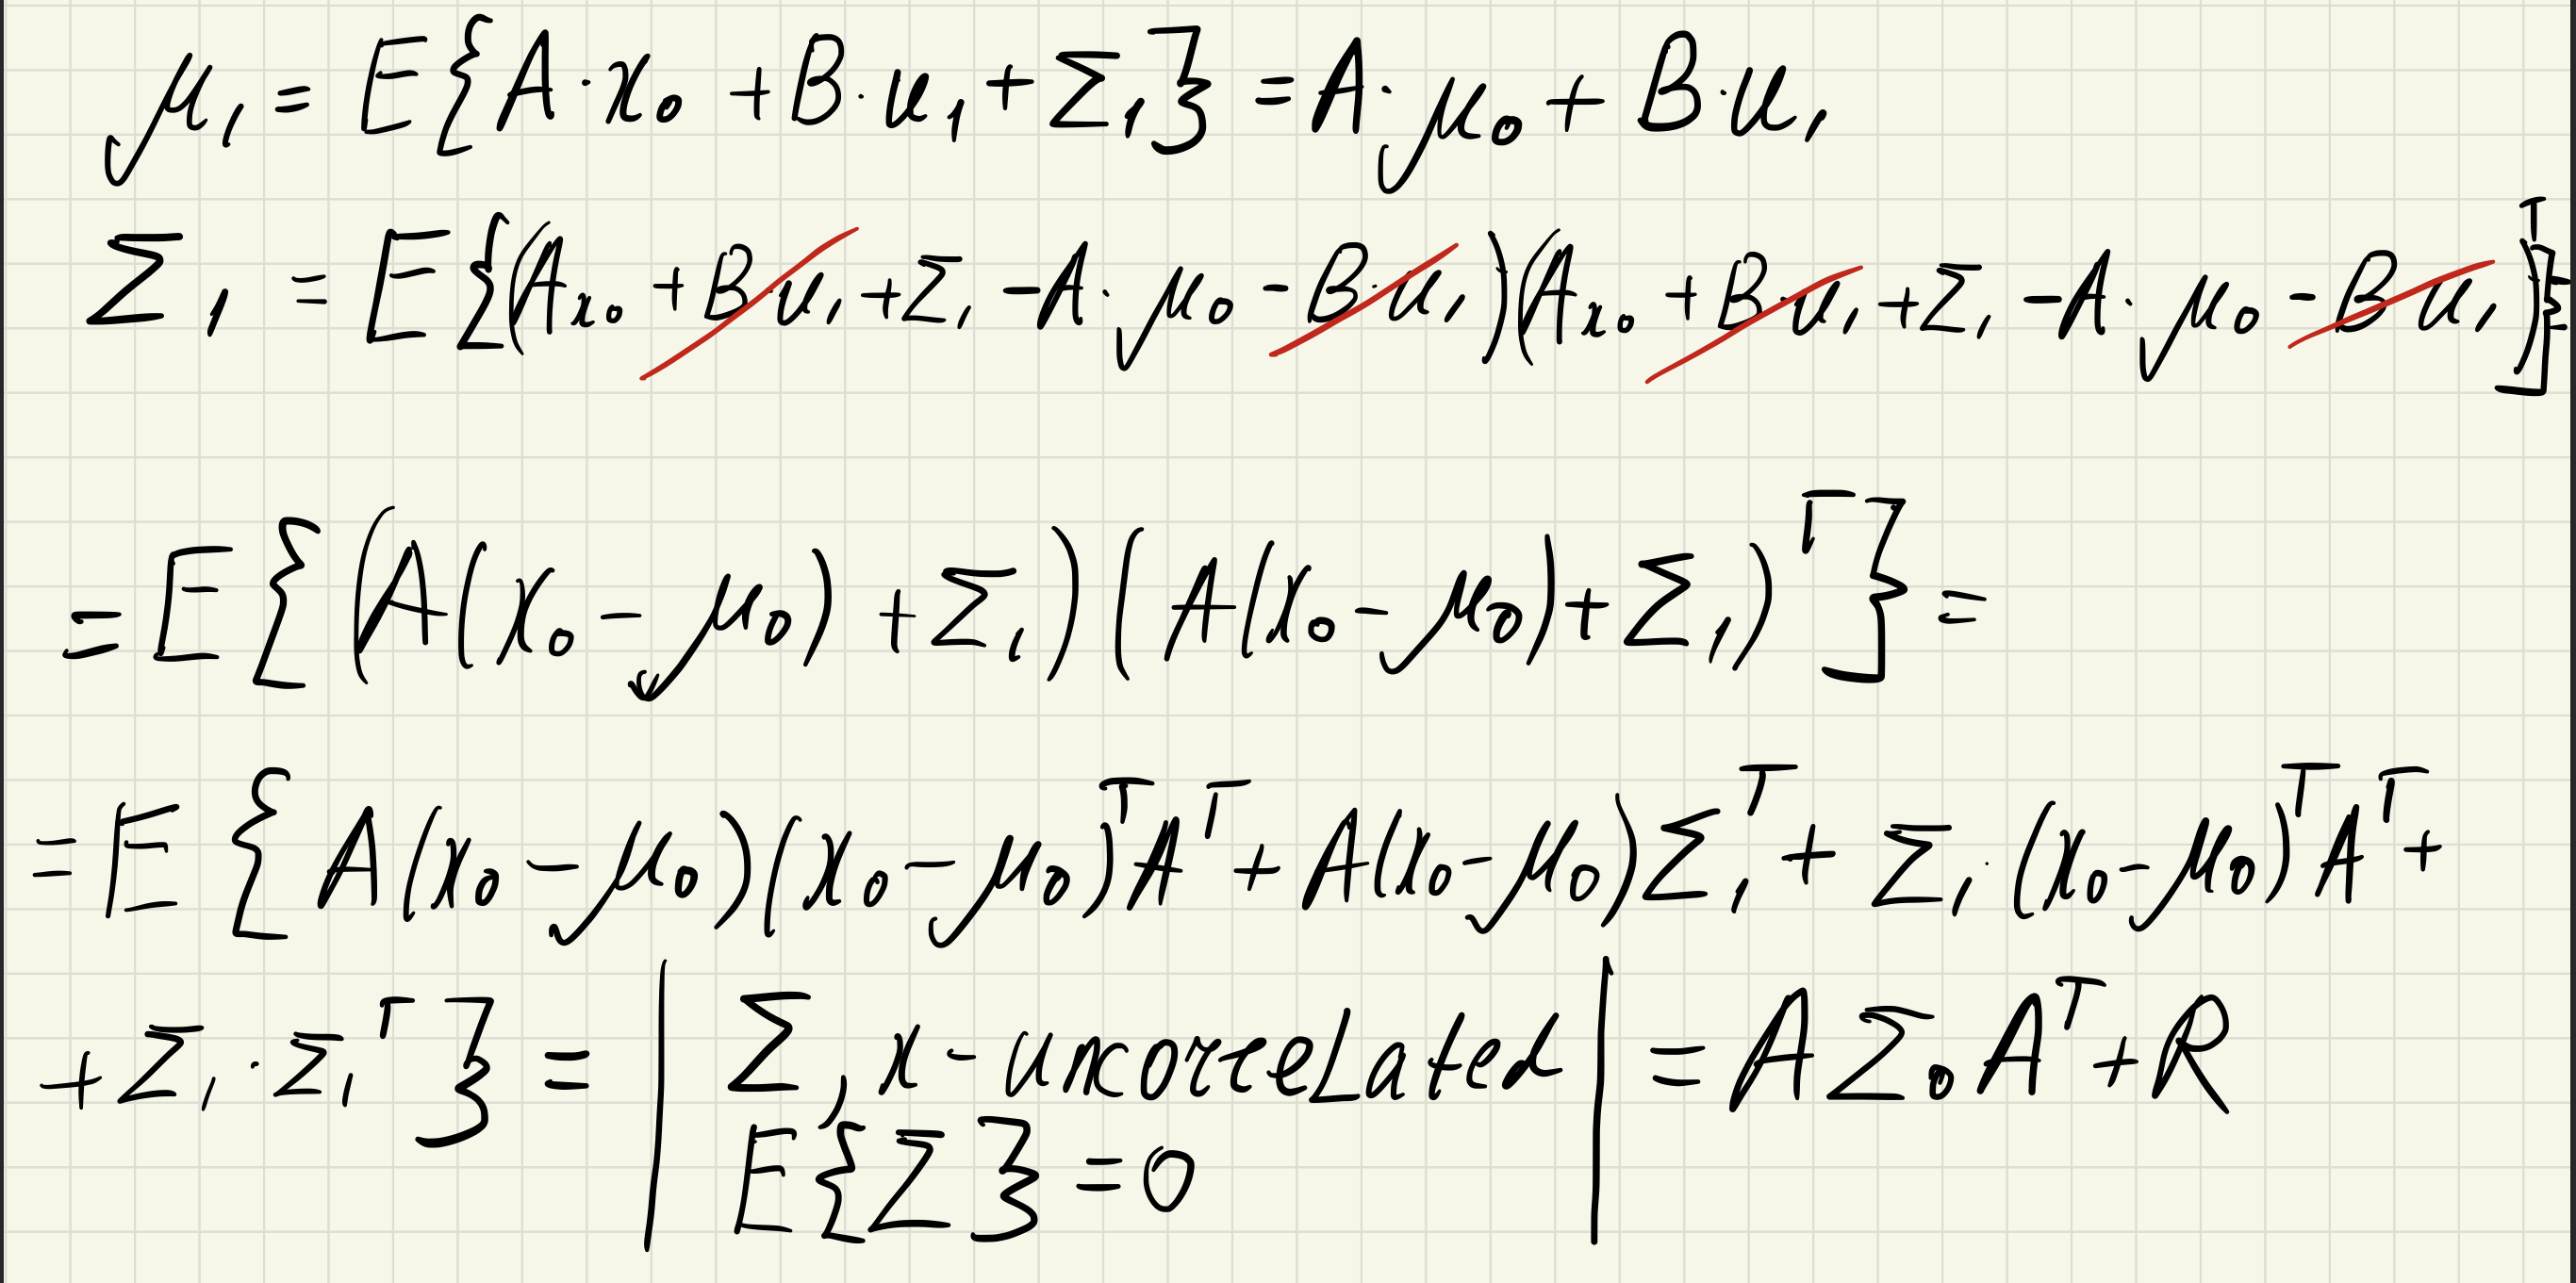

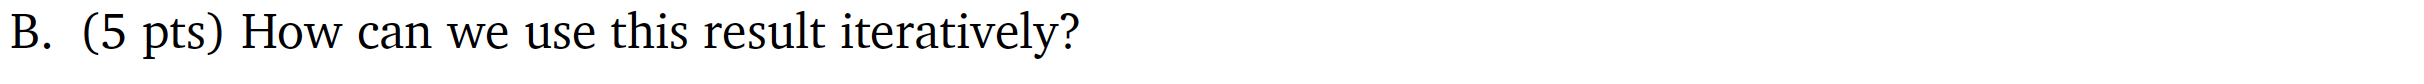

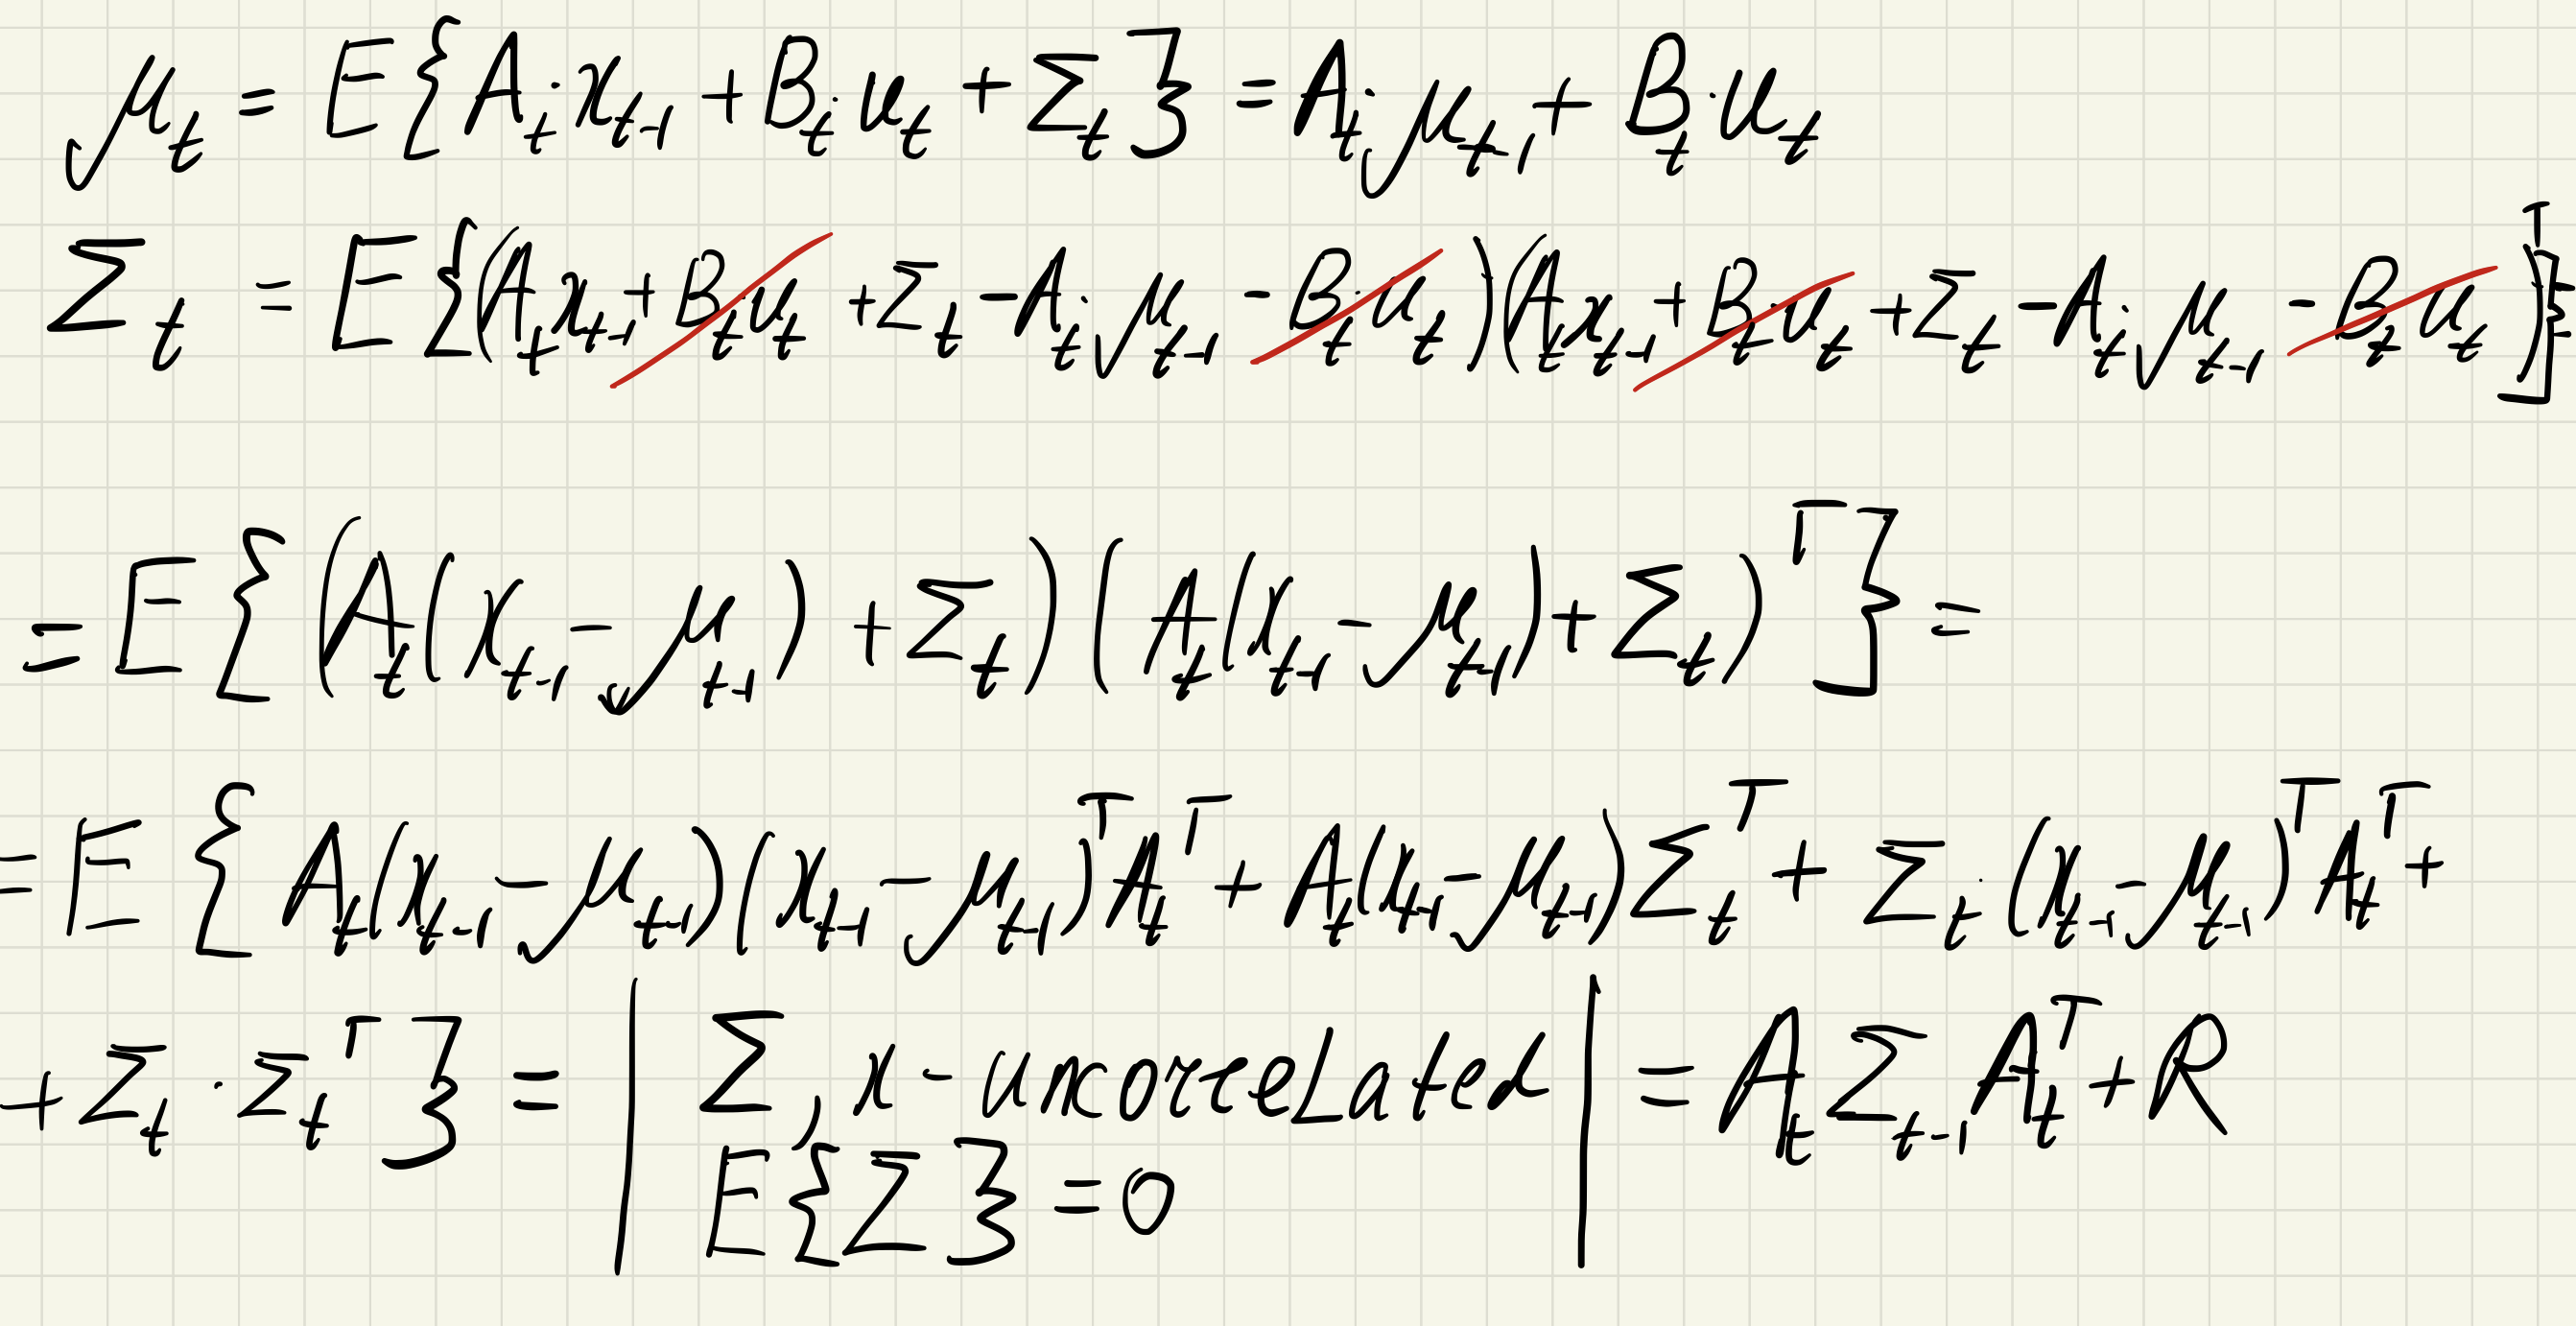

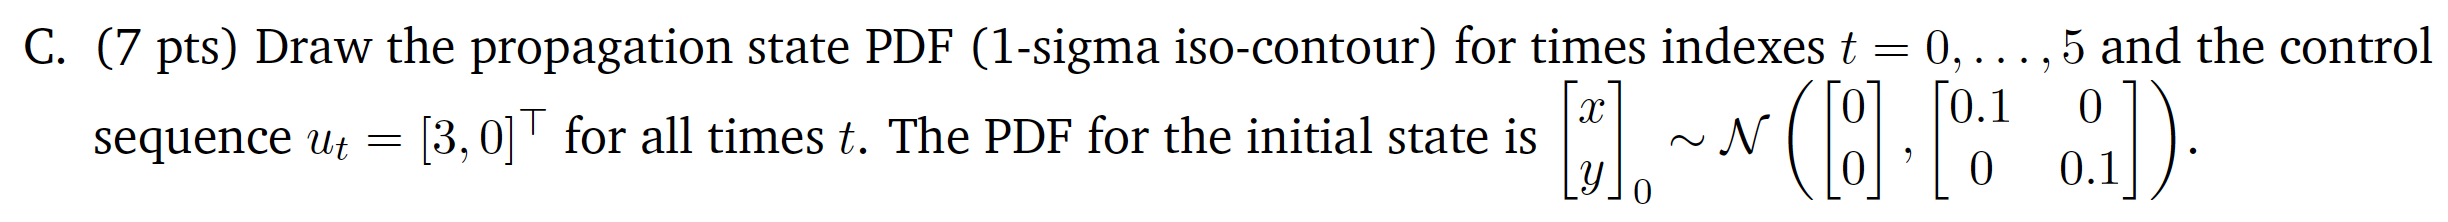

In [111]:
dt = 0.5
A = np.eye(2)
B = np.eye(2) * dt
R = np.eye(2) * 0.1

In [112]:
mu = np.zeros([2, 1, 6])
cov = np.zeros([2, 2, 6])
ut = np.array([[3], [0]])

In [113]:
mu[:, :, 0] = np.array([[0], [0]])

In [114]:
cov[:,:,0] = np.array([[0.1, 0], [0, 0.1]])

In [115]:
for i in range(1, 6):
    mu[:, :, i] = A @ mu[:, :, i - 1] + B @ ut
    cov[:, :, i] = A @ cov[:, :, i - 1] @ A.T + R

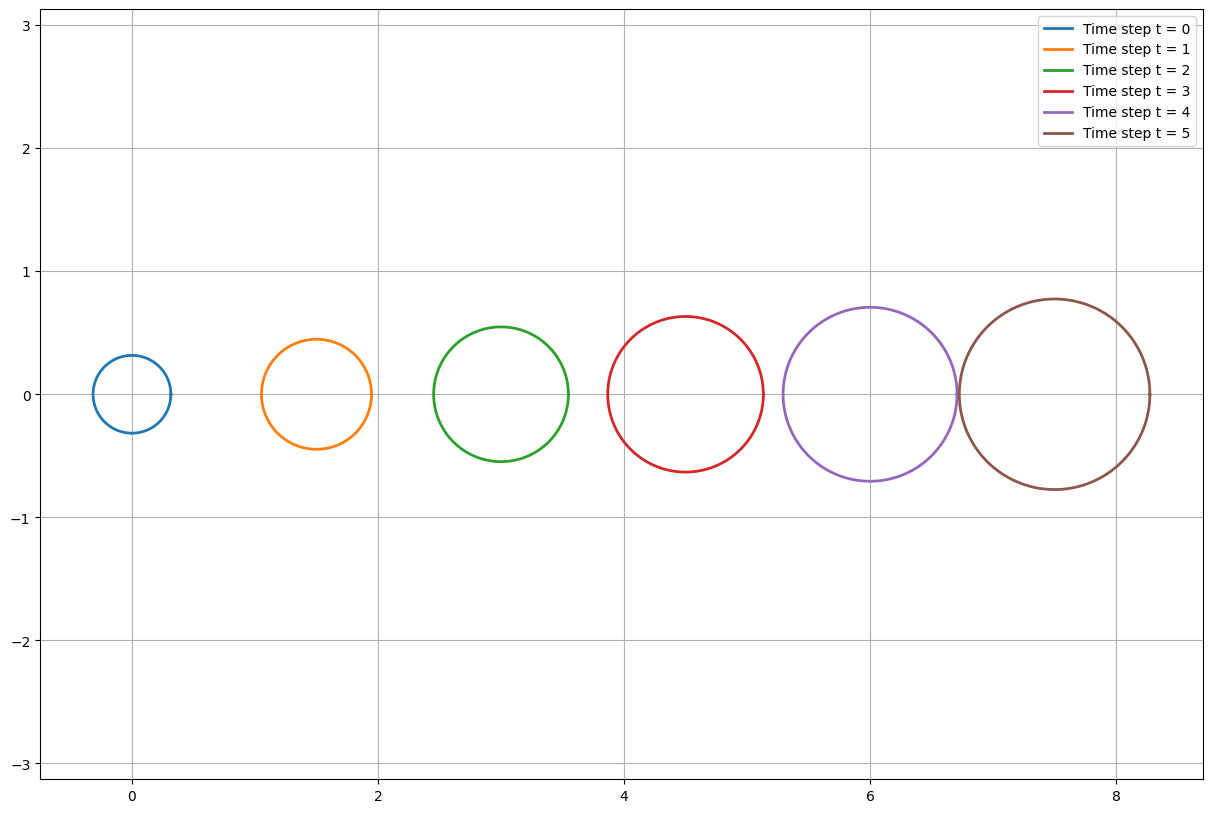

In [116]:
plt.figure(figsize = [15, 10])
for i in range(6):
    plot2dcov(mu[:, :, i], cov[:, :, i], 1, "Time step t = " + str(i))

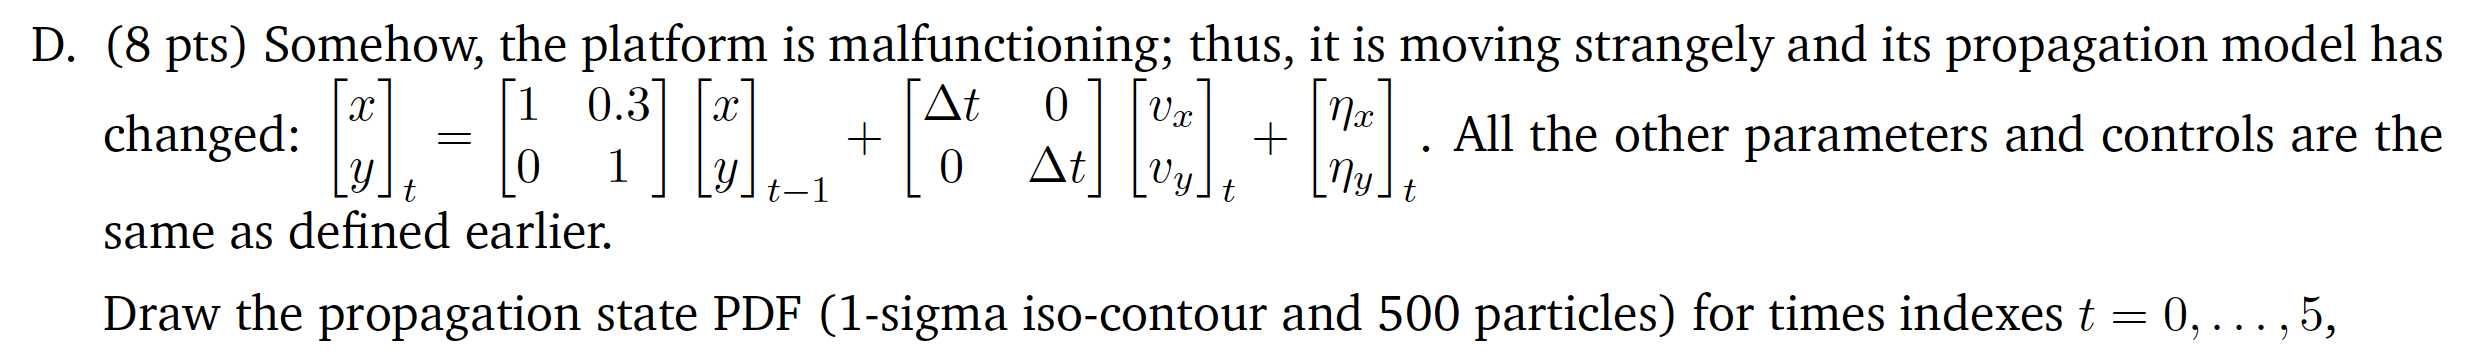

In [117]:
A = np.array([[1, 0.3], [0, 1]])
for i in range(1, 6):
    mu[:, :, i] = A @ mu[:, :, i - 1] + B @ ut
    cov[:, :, i] = A @ cov[:, :, i - 1] @ A.T + R

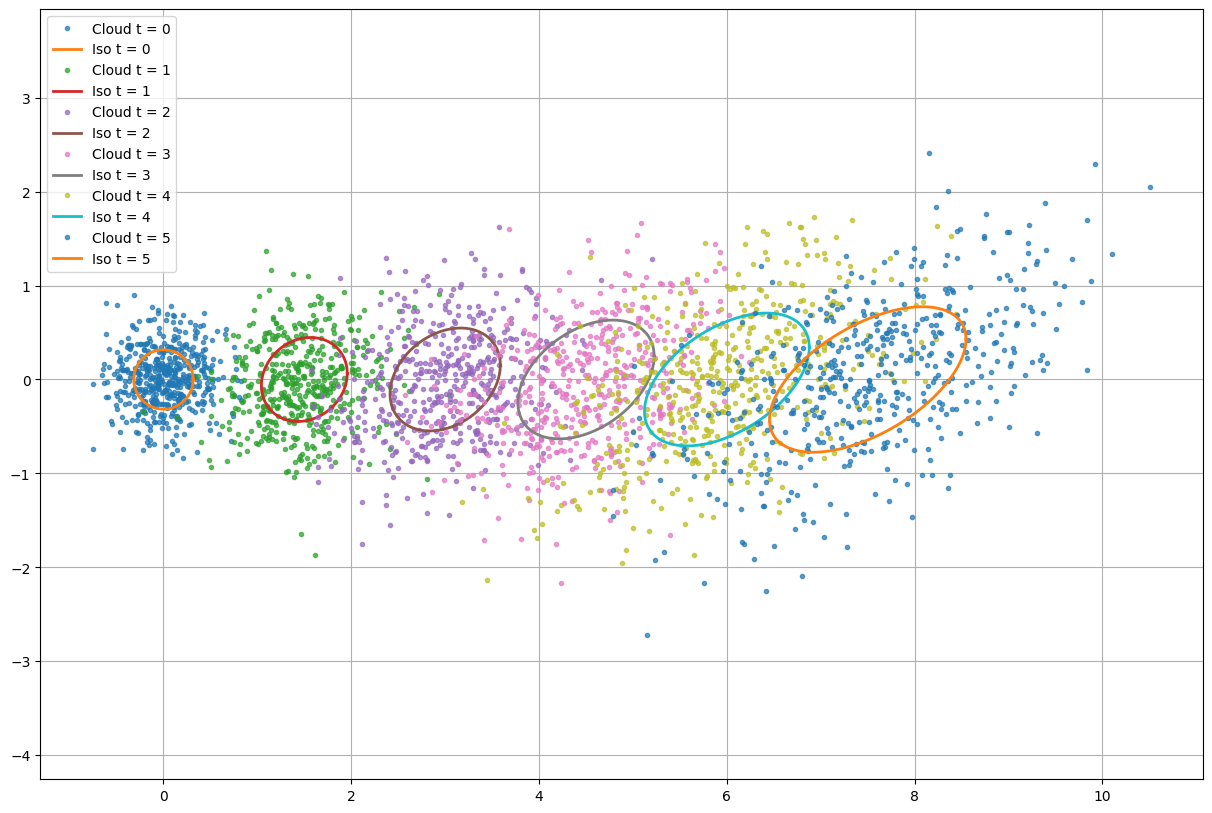

In [118]:
plt.figure(figsize = [15, 10])
for i in range(6):
    x, y = np.random.multivariate_normal(mu[:, :, i].reshape(2, 1).squeeze(), cov[:, :, i], 500).T
    plt.plot(x, y, '.', alpha = 0.7, label = "Cloud t = " + str(i))
    plot2dcov(mu[:, :, i], cov[:, :, i], 1, "Iso t = " + str(i))

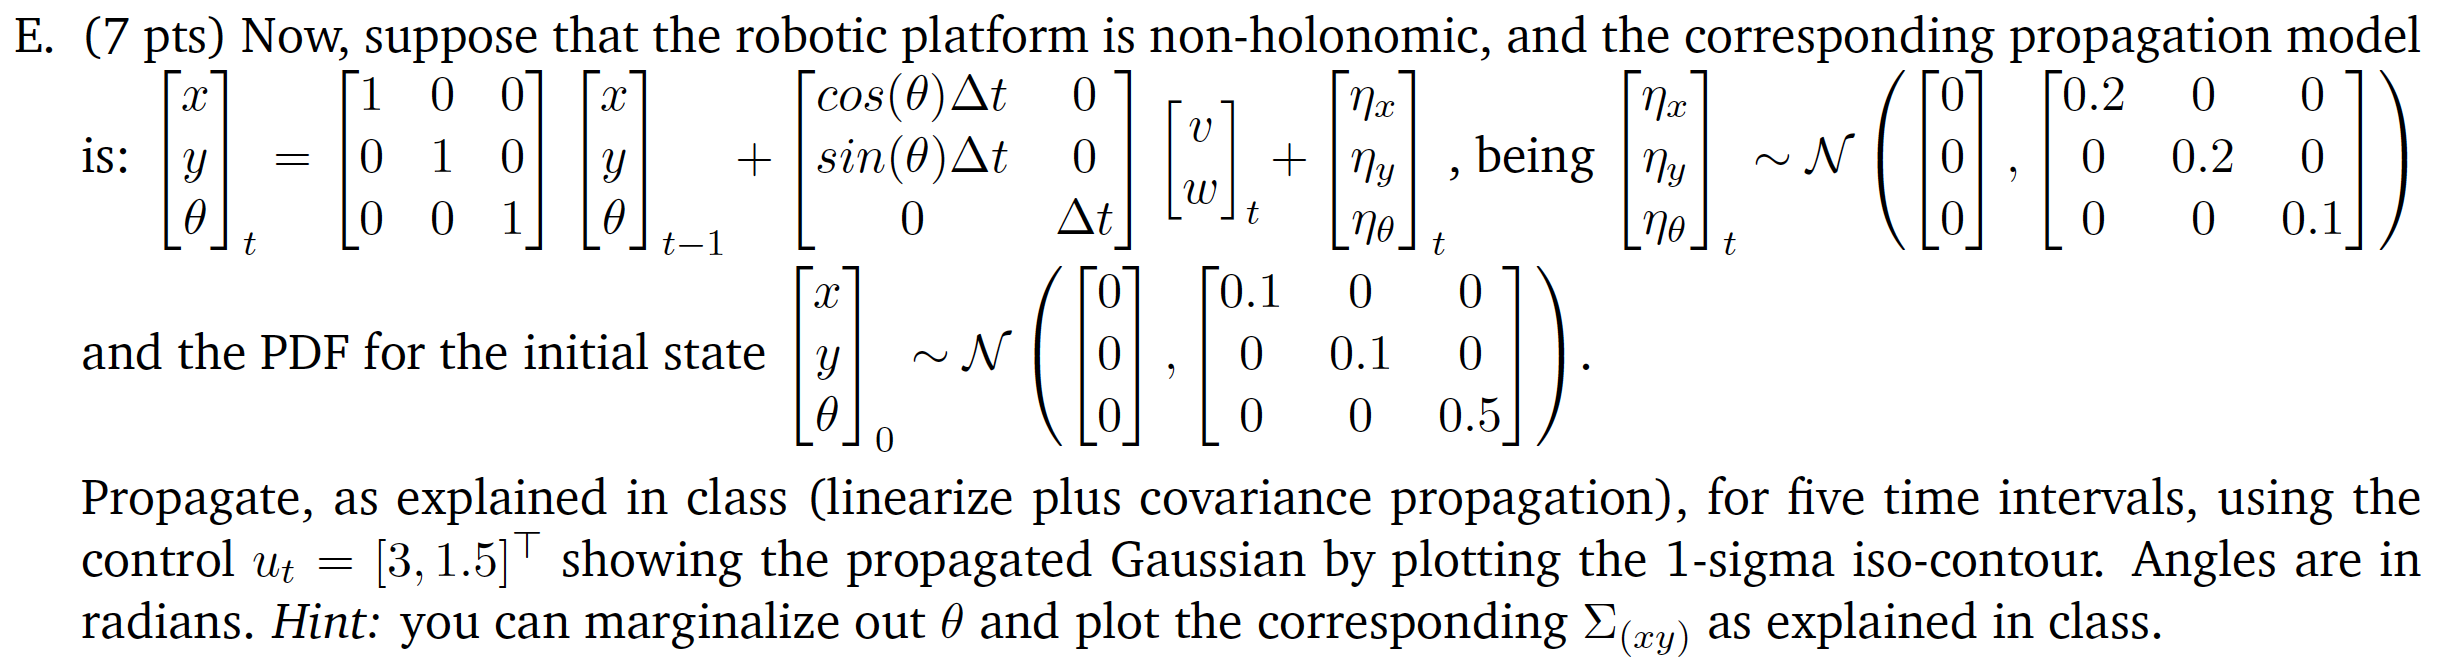

In [119]:
A = np.eye(3)
R = np.array([[0.2, 0, 0], [0, 0.2, 0], [0, 0, 0.1]])
G = np.zeros([3, 3, 6])
V = np.zeros([3, 2, 6])
mu = np.zeros([3, 1, 6])
cov = np.zeros([3, 3, 6])
ut = np.array([[3], [1.5]])

In [120]:
G[:, :, 0] = np.array([[1, 0, -np.sin(mu[2, 0, 0]) * dt * ut[0, 0]],
                       [0, 1,  np.cos(mu[2, 0, 0]) * dt * ut[0, 0]],
                       [0, 0,             1     ]])

V[:, :, 0] = np.array([[np.cos(mu[2, 0, 0]) * dt, 0], [np.sin(mu[2, 0, 0]) * dt, 0], [0, dt]])

mu[:, :, 0] = np.array([[0], [0], [0]])
cov[:, :, 0] = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

In [121]:
for i in range(5):
    mu[:, :, i + 1] = A @ mu[:, :, i] + V[:, :, i] @ ut
    cov[:, :, i + 1] = G[:, :, i] @ cov[:, :, i] @ G[:, :, i].T + R
    G[:, :, i + 1] = np.array([[1, 0, -np.sin(mu[2, 0, i + 1]) * dt * ut[0, 0]],
                               [0, 1,  np.cos(mu[2, 0, i + 1]) * dt * ut[0, 0]],
                               [0, 0,                                       1]])

    V[:, :, i + 1] = np.array([[np.cos(mu[2, 0, i + 1]) * dt, 0], [np.sin(mu[2, 0, i + 1]) * dt, 0], [0, dt]])



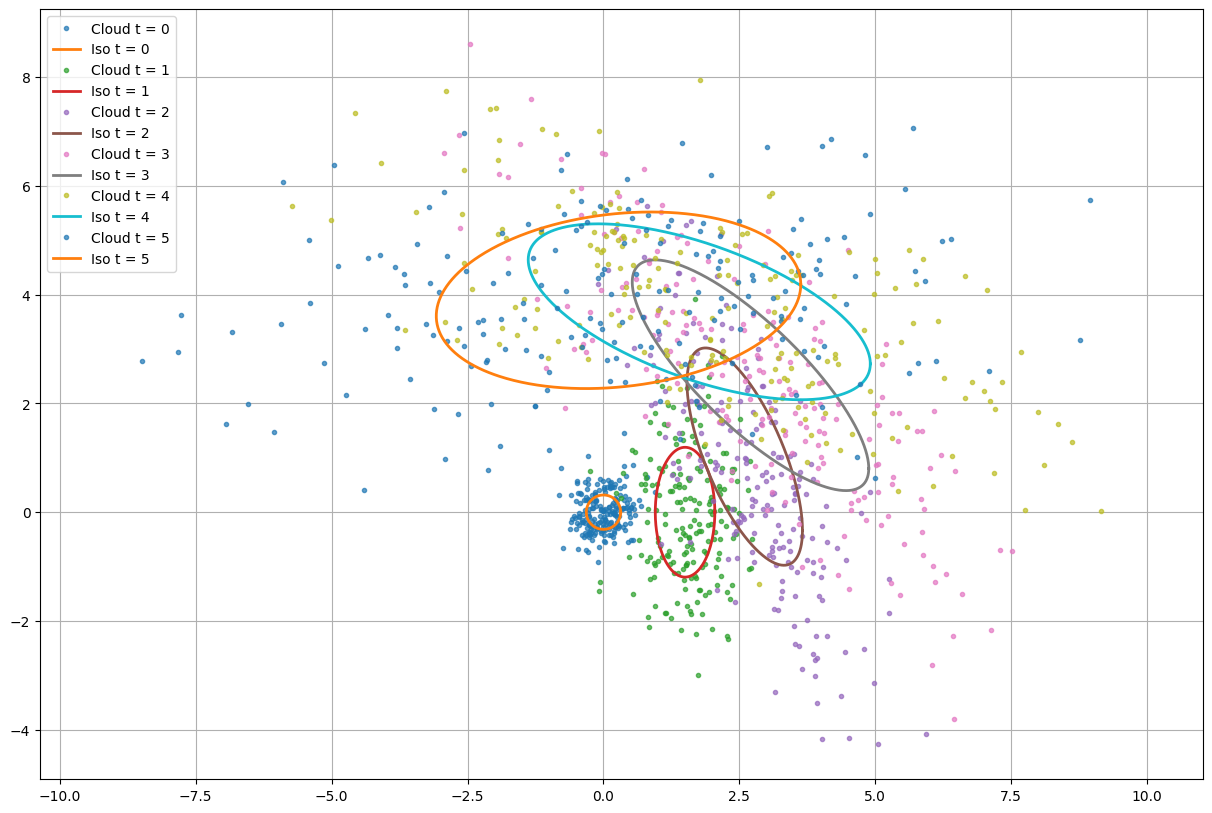

In [122]:
plt.figure(figsize = [15, 10])
for i in range(6):
    x, y = np.random.multivariate_normal(mu[:2, 0, i], cov[:2, :2, i], 200).T
    plt.plot(x, y, '.', alpha = 0.7, label = "Cloud t = " + str(i))
    plot2dcov(mu[:2, :2, i], cov[:2, :2, i], 1, "Iso t = " + str(i))
    

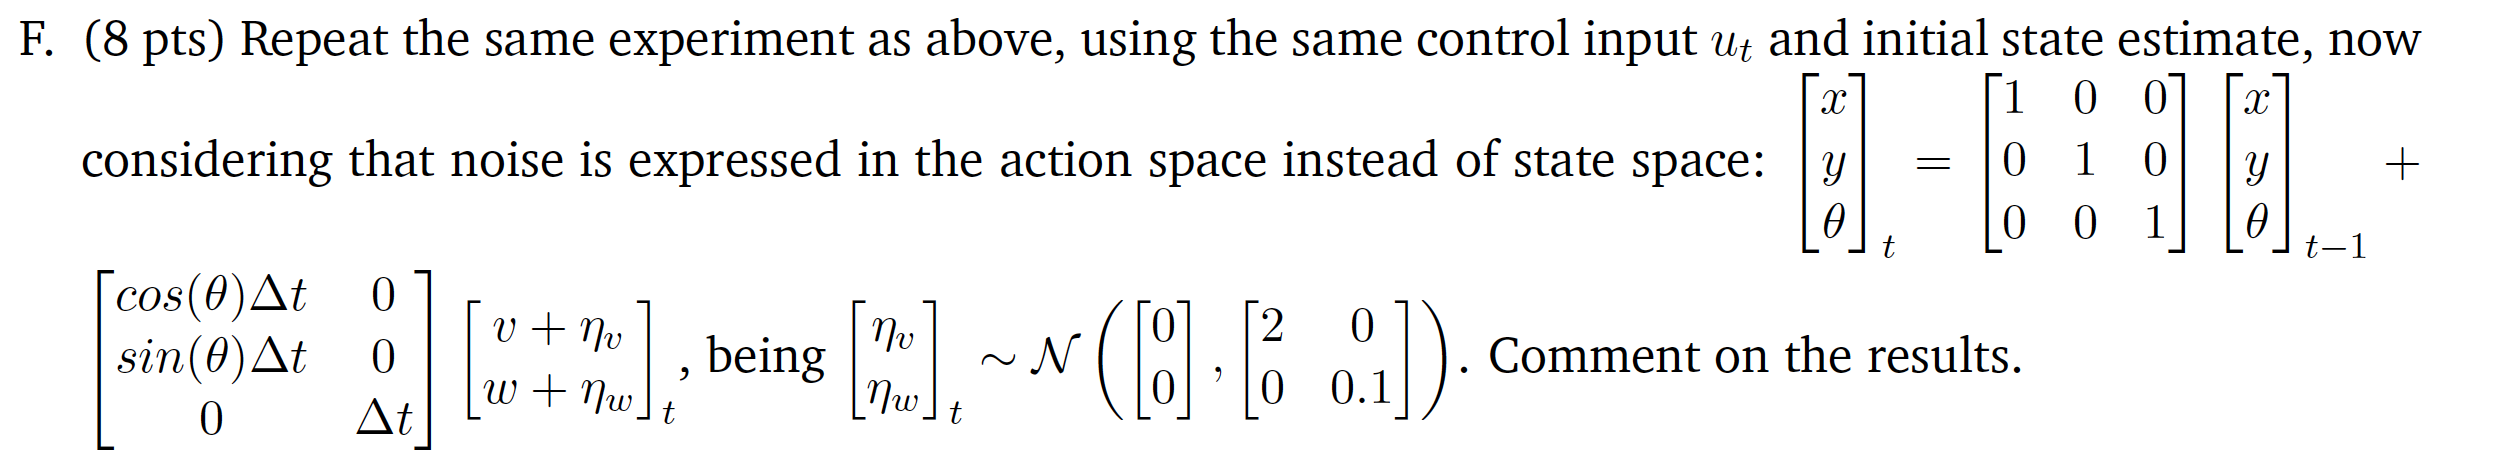

In [123]:
A = np.eye(3)
R = np.array([[2, 0], [0, 0.1]])
G = np.zeros([3, 3, 6])
V = np.zeros([3, 2, 6])
mu = np.zeros([3, 1, 6])
cov = np.zeros([3, 3, 6])
ut = np.array([[3], [1.5]])

In [124]:
G[:, :, 0] = np.array([[1, 0, -np.sin(mu[2, 0, 0]) * dt * ut[0, 0]],
                       [0, 1,  np.cos(mu[2, 0, 0]) * dt * ut[0, 0]],
                       [0, 0,             1     ]])

V[:, :, 0] = np.array([[np.cos(mu[2, 0, 0]) * dt, 0], [np.sin(mu[2, 0, 0]) * dt, 0], [0, dt]])

mu[:, :, 0] = np.array([[0], [0], [0]])
cov[:, :, 0] = np.array([[0.1, 0, 0], [0, 0.1, 0], [0, 0, 0.5]])

In [125]:
for i in range(5):
    mu[:, :, i + 1] = A @ mu[:, :, i] + V[:, :, i] @ ut
    cov[:, :, i + 1] = G[:, :, i] @ cov[:, :, i] @ G[:, :, i].T + V[:, :, i] @ R @ V[:, :, i].T
    G[:, :, i + 1] = np.array([[1, 0, -np.sin(mu[2, 0, i + 1]) * dt * ut[0, 0]],
                               [0, 1,  np.cos(mu[2, 0, i + 1]) * dt * ut[0, 0]],
                               [0, 0,                                       1]])

    V[:, :, i + 1] = np.array([[np.cos(mu[2, 0, i + 1]) * dt, 0], [np.sin(mu[2, 0, i + 1]) * dt, 0], [0, dt]])

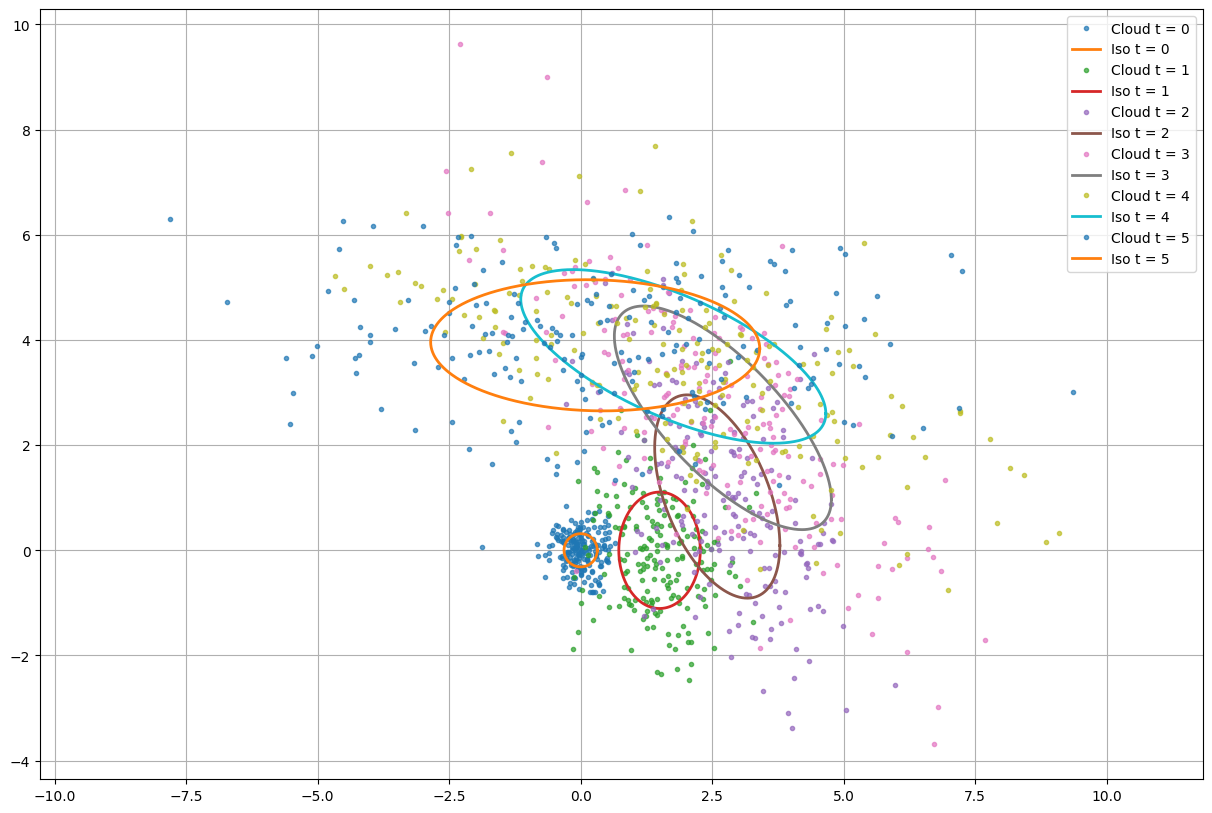

In [126]:
plt.figure(figsize = [15, 10])
for i in range(6):
    x, y = np.random.multivariate_normal(mu[:2, 0, i], cov[:2, :2, i], 200).T
    plt.plot(x, y, '.', alpha = 0.7, label = "Cloud t = " + str(i))
    plot2dcov(mu[:2, :2, i], cov[:2, :2, i], 1, "Iso t = " + str(i))

Because of uncertainty in control impact appared inaccuracy in estimating of robot position: parameters x and y became correlated (it can be seen due to rotation angle changes) and their variance increased on each step ((it can be due to ellipse radiouses changes)). The noise impact was less than in previous task due to the noise causes: centers of ellipses are approximately at the same places, but the covariance became less.

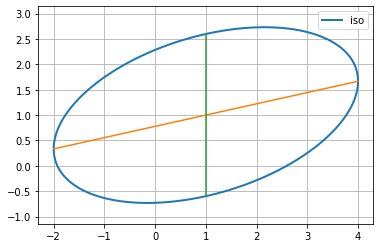

In [8]:
import numpy as np
import matplotlib.pyplot as plt
plot2dcov (np.array([[1], [1]]), np.array([[9, 2], [2, 3]]), 1, 'iso')
plt.plot([-3 + 1, 3 + 1], [-2/3 + 1, 2/ 3 + 1])
plt.plot([0 + 1, 0 + 1], [-np.sqrt(23) / 3 + 1, np.sqrt(23) / 3 + 1])